# Find the best place to open a Restaurant
### In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

### To create the dataframe I decided to use the wikipedia Python API. It's very easy to get the pandas dataframe.

In [3]:
!pip install wikipedia
!pip install folium
!pip install geopy
!pip install geopandas
# !pip install descartes

  Stored in directory: /home/dsxuser/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 102kB 9.9MB/s eta 0:00:01
     |████████████████████████████████| 931kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 8.8MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 43.2MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 44.7MB/s eta 0:00:01


In [52]:
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import wikipedia as wp
import requests
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopandas as gpd

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

print('Libraries imported.')

Libraries imported.


In [102]:
wp.set_lang("it")
html = wp.page("Municipi_di_Milano").html()

milan_borough = pd.read_html(html)[3]

milan_borough['#'] = milan_borough['#'].str.replace('Municipio ', '')

milan_borough.columns = ('Borough', 'Name', 'Area(km2)', 'Population(31/12/2018)', 'Population_Density(km2)', 'Neighborhood', 'Localizzazione')

milan_borough.drop(columns=["Localizzazione"], inplace=True)
milan_borough.drop(milan_borough.tail(1).index, inplace=True)

# milan_borough.set_index('Borough', inplace=True)
milan_borough

,Borough,Name,Area(km2),Population(31/12/2018),Population_Density(km2),Neighborhood
0,1,Centro storico,967,98 531,10 189,"Cordusio, Cinque Vie, Brisa, Brera, Sant’Ambro..."
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",1258,162 090,12 884,"Stazione Centrale, Loreto, Turro, Crescenzago,..."
2,3,"Città Studi, Lambrate, Venezia",1423,144 110,10 127,"Porta Venezia, Porta Monforte, Casoretto, Rott..."
3,4,"Vittoria, Forlanini",2095,161 551,7 711,"Porta Vittoria, Porta Romana, Acquabella, Sena..."
4,5,"Vigentino, Chiaravalle, Gratosoglio",2987,126 089,4 221,"Porta Vigentina, Porta Lodovica, Porta Ticines..."
5,6,"Barona, Lorenteggio",1828,151 291,8 276,"Porta Genova, Conchetta, Moncucco, Barona, Qua..."
6,7,"Baggio, De Angeli, San Siro",3134,175 465,5 598,"Vepra, Quartiere De Angeli - Frua, San Siro, Q..."
7,8,"Fiera, Gallaratese, Quarto Oggiaro",2372,188 367,7 941,"Porta Volta, Bullona, Ghisolfa, Portello, Cagn..."
8,9,"Stazione Garibaldi, Niguarda",2112,187 773,8 890,"Porta Garibaldi, Porta Nuova, Centro Direziona..."


In [103]:
geo_list = []

for x in range(1,10):
    page = requests.get('https://en.wikipedia.org/wiki/Zone_' + str(x) + '_of_Milan')
    el = BeautifulSoup(page.content, 'html.parser').find(id='coordinates').find('span', class_='geo')
    geo_list.append(el.text.split("; "))

lat, lon = zip(*geo_list)

milan_borough['Latitude'] = lat
milan_borough['Longitude'] = lon
milan_borough

,Borough,Name,Area(km2),Population(31/12/2018),Population_Density(km2),Neighborhood,Latitude,Longitude
0,1,Centro storico,967,98 531,10 189,"Cordusio, Cinque Vie, Brisa, Brera, Sant’Ambro...",45.471282,9.184999
1,2,"Stazione Centrale, Gorla, Turro, Greco, Cresce...",1258,162 090,12 884,"Stazione Centrale, Loreto, Turro, Crescenzago,...",45.486117,9.203635
2,3,"Città Studi, Lambrate, Venezia",1423,144 110,10 127,"Porta Venezia, Porta Monforte, Casoretto, Rott...",45.482506,9.241047
3,4,"Vittoria, Forlanini",2095,161 551,7 711,"Porta Vittoria, Porta Romana, Acquabella, Sena...",45.431573,9.244738
4,5,"Vigentino, Chiaravalle, Gratosoglio",2987,126 089,4 221,"Porta Vigentina, Porta Lodovica, Porta Ticines...",45.416987,9.238333
5,6,"Barona, Lorenteggio",1828,151 291,8 276,"Porta Genova, Conchetta, Moncucco, Barona, Qua...",45.440087,9.155924
6,7,"Baggio, De Angeli, San Siro",3134,175 465,5 598,"Vepra, Quartiere De Angeli - Frua, San Siro, Q...",45.461244,9.089917
7,8,"Fiera, Gallaratese, Quarto Oggiaro",2372,188 367,7 941,"Porta Volta, Bullona, Ghisolfa, Portello, Cagn...",45.515925,9.140196
8,9,"Stazione Garibaldi, Niguarda",2112,187 773,8 890,"Porta Garibaldi, Porta Nuova, Centro Direziona...",45.516888,9.191866


In [8]:
# The code was removed by Watson Studio for sharing.

,NIL,Municipio
0,01. Duomo,1
1,02. Brera,1
2,03. Giardini Porta Venezia,1
3,04. Guastalla,1
4,05. Porta Vigentina - Porta Lodovica,5


In [9]:
milan_borough.rename(columns={"NIL": "Neighborhood", "Municipio": "Borough"}, inplace=True)
milan_borough.head()

,Neighborhood,Borough
0,01. Duomo,1
1,02. Brera,1
2,03. Giardini Porta Venezia,1
3,04. Guastalla,1
4,05. Porta Vigentina - Porta Lodovica,5


In [10]:
milan_neighborhood_geodf = gpd.read_file('https://dati.comune.milano.it/dataset/e8e765fc-d882-40b8-95d8-16ff3d39eb7c/resource/9c4e0776-56fc-4f3d-8a90-f4992a3be426/download/ds964_nil_wm.geojson')
print(type(milan_neighborhood_geodf))
print(milan_neighborhood_geodf.shape)
milan_neighborhood_geodf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(88, 9)


,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Length,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15274 45.43887, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10591 45.49084, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15495 45.48852, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16763 45.52272, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20028 45.52846, ..."


In [11]:
milan_neighborhood = milan_neighborhood_geodf[['ID_NIL', 'NIL']].copy()
milan_neighborhood.columns = ('Id', 'Neighborhood')
print(milan_neighborhood.shape)
milan_neighborhood.tail()

(88, 2)


,Id,Neighborhood
83,68,PAGANO
84,2,BRERA
85,33,ROGOREDO - SANTA GIULIA
86,17,ADRIANO
87,53,LORENTEGGIO


In [12]:
from shapely.wkt import loads as load_wkt

centroid_list = []

for polygon in milan_neighborhood_geodf["geometry"]:
    box_str = str(polygon)
    p1 = load_wkt(box_str)
    point = p1.centroid
#     print(type(p1.centroid.x))
#     print(p1.centroid.y)
    centroid_list.append((p1.centroid.y, p1.centroid.x))

lat_centr, lon_centr = zip(*centroid_list)

milan_neighborhood['Latitude'] = lat_centr
milan_neighborhood['Longitude'] = lon_centr
milan_neighborhood.head()

,Id,Neighborhood,Latitude,Longitude
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260
1,64,TRENNO,45.492822,9.101675
2,67,PORTELLO,45.484490,9.153947
3,81,BOVISASCA,45.517433,9.156731
4,84,PARCO NORD,45.523514,9.184235


In [18]:
print(str(milan_neighborhood.shape))
print(str(milan_borough.shape))
new_list = []

for ind1, neighborhood in milan_neighborhood.iterrows():
    for ind2, borough in milan_borough.iterrows():
        s1 = neighborhood[["Neighborhood"]].item().lower().partition(' - ')[0]
        s2 = borough[["Neighborhood"]].item().lower()
#         print(str(type(s1)) + ": " + s1 + " # " + str(type(s2)) + ": " + s2)
        if s1 in s2:
            frame = {'Id': neighborhood[["Id"]].item(), 
                     'Neighborhood': neighborhood[["Neighborhood"]].item(),
                     'Borough': borough[["Borough"]].item(),
#                      'Name': borough[["Name"]].item(),
                     'Latitude': neighborhood[["Latitude"]].item(),
                     'Longitude': neighborhood[["Longitude"]].item()
                    }
            new_list.append(frame)

print(len(new_list))
cn = ['Id', 'Neighborhood', 'Borough', 'Latitude', 'Longitude']
df_milan_complete = pd.DataFrame(new_list, columns = cn)
print(str(df_new.shape))
df_milan_complete.head()

(88, 4)
(84, 2)
82
(82, 5)


,Id,Neighborhood,Borough,Latitude,Longitude
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,6,45.438460,9.137260
1,64,TRENNO,8,45.492822,9.101675
2,67,PORTELLO,8,45.484490,9.153947
3,81,BOVISASCA,9,45.517433,9.156731
4,84,PARCO NORD,9,45.523514,9.184235


In [33]:
df_milan_complete

,Id,Neighborhood,Borough,Latitude,Longitude
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,6,45.438460,9.137260
1,64,TRENNO,8,45.492822,9.101675
2,67,PORTELLO,8,45.484490,9.153947
3,81,BOVISASCA,9,45.517433,9.156731
4,84,PARCO NORD,9,45.523514,9.184235
5,63,FIGINO,7,45.491381,9.074376
6,76,QUARTO OGGIARO - VIALBA - MUSOCCO,8,45.513636,9.137731
7,11,ISOLA,9,45.490894,9.189617
8,61,QUARTO CAGNINO,7,45.473740,9.108096
9,60,STADIO - IPPODROMI,7,45.479641,9.123833


### Create map of milan using latitude and longitude values 
#### Understand better the data

In [16]:
address = 'Milan, MI'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan are 45.4668, 9.1905.


In [19]:
map_milan = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_milan_complete['Latitude'], df_milan_complete['Longitude'], df_milan_complete['Id'], df_milan_complete['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milan)  
    
map_milan

### Use foursquare API to check the places in milan

In [20]:
# The code was removed by Watson Studio for sharing.

In [34]:
radius = 500 # define radius
df_milan_complete.loc[11, 'Neighborhood']

neighborhood_latitude = df_milan_complete.loc[11, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_milan_complete.loc[11, 'Longitude'] # neighborhood longitude value
neighborhood_name = df_milan_complete.loc[11, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

url

Latitude and longitude values of DUOMO are 45.46370717900563, 9.186948292279983.


'https://api.foursquare.com/v2/venues/explore?&client_id=CPAC2GRN3VCADF3FNWJAPLQYMNICM0YBUAGHFXMZEGRZXDPG&client_secret=LOH4RGLND40CSDX10KBUTD2OV3GQN3DJXCTIPO54DTNDI4UW&v=20200605&ll=45.46370717900563,9.186948292279983&radius=500&limit=100'

### Create a function that extracts the category of the venue

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Extract venues for each neighborhood in Milan

In [35]:
def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)
        
        if requests.get(url).json() is not None:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            # return only relevant information for each nearby venue
            for venue in results:
                venues.append((
                    neighborhood,
                    lat, 
                    long, 
                    venue['venue']['name'], 
                    venue['venue']['id'], 
                    venue['venue']['location']['lat'], 
                    venue['venue']['location']['lng'],  
                    venue['venue']['location']['distance'],  
                    venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
    
    return venues 

milan_venues = getNeighborhoodVenues(df_milan_complete['Latitude'], df_milan_complete['Longitude'], df_milan_complete['Neighborhood'])

In [37]:
print('There are {} unique venue categories. Some of them are as below:'.format(len(milan_venues['VenueCategory'].unique())))
milan_venues.head()

There are 293 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Mio,4c1bd57663750f476e8cb567,45.442099,9.132717,538,Italian Restaurant
1,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Osteria Ma.Si.,4ca8d32fb7106dcb708f76a5,45.444339,9.140705,707,Italian Restaurant
2,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Lungolanotte,4bbf1ed930c99c7428a05411,45.442546,9.133911,524,Italian Restaurant
3,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Ittolitos,4c41851eda3dc9286506c9b9,45.440443,9.146048,721,Pub
4,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Football City,4c86a842d8086dcbe2609c52,45.443407,9.130824,745,Soccer Field


In [38]:
print(milan_venues.shape)
milan_venues.head()

(4646, 9)


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Mio,4c1bd57663750f476e8cb567,45.442099,9.132717,538,Italian Restaurant
1,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Osteria Ma.Si.,4ca8d32fb7106dcb708f76a5,45.444339,9.140705,707,Italian Restaurant
2,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Lungolanotte,4bbf1ed930c99c7428a05411,45.442546,9.133911,524,Italian Restaurant
3,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Ittolitos,4c41851eda3dc9286506c9b9,45.440443,9.146048,721,Pub
4,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.43846,9.13726,Football City,4c86a842d8086dcbe2609c52,45.443407,9.130824,745,Soccer Field


In [41]:
print('Top 10 distinct venue counts are as below')
milan_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:100]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Italian Restaurant,292
Pizza Place,198
Café,162
Hotel,112
Ice Cream Shop,86
Plaza,81
Supermarket,80
Restaurant,72
Japanese Restaurant,68


In [43]:
restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place','Italian Restaurant']
vegan_restaurant_list = ['Vegetarian / Vegan Restaurant']

# Filter restaurants 
    
milan_venues['RestFlag']=False
for restCat in restaurant_list:
    milan_venues['RestFlag'] = milan_venues['RestFlag'] | milan_venues['VenueCategory'].str.contains(restCat)
    
milan_restaurants = milan_venues[milan_venues['RestFlag'] == True].iloc[:,:-1]
vegan_restaurants = milan_restaurants[ milan_restaurants['VenueCategory'].isin(vegan_restaurant_list) ]
other_restaurants = milan_restaurants[ ~milan_restaurants['VenueCategory'].isin(vegan_restaurant_list) ]

print('Total number of restaurants:', len(milan_restaurants['VenueId'].unique()))
print('Total number of vegan restaurants:', len(vegan_restaurants['VenueId'].unique()))
print('Percentage of vegan restaurants: {:.2f}%'.format(len(vegan_restaurants['VenueId'].unique()) / len(milan_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 1109
Total number of vegan restaurants: 12
Percentage of vegan restaurants: 1.08%


63 neighborhoods do not have any vegan restaurant


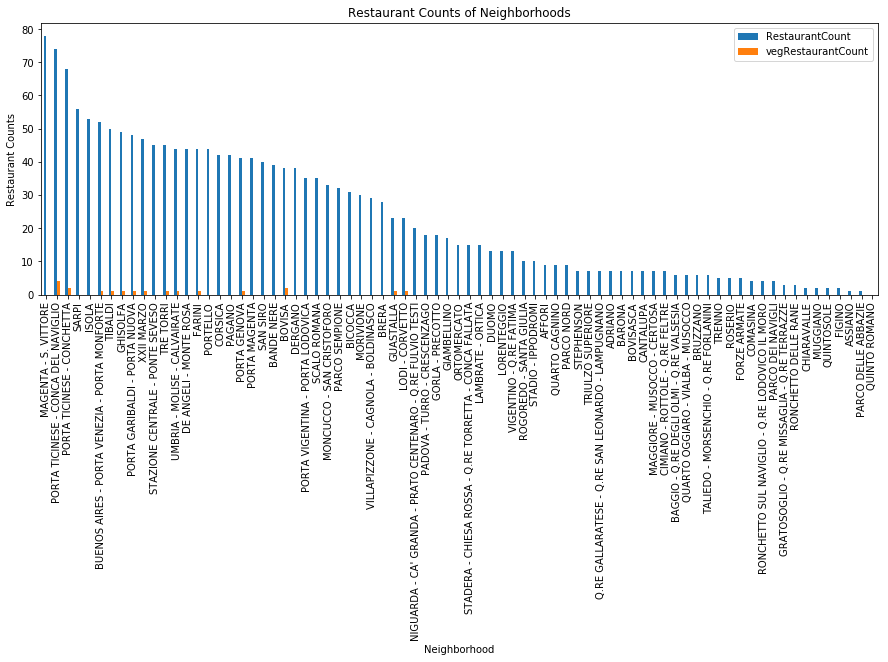

In [45]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  milan_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(milan_venues['Neighborhood']) - set(milan_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of vegan restaurants in each Neighborhood
df_veg_rest_counts =  vegan_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "vegRestaurantCount"})[['vegRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(milan_venues['Neighborhood']) - set(vegan_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_veg_rest_counts = df_veg_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'vegRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_veg_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_veg_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any vegan restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','vegRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

In [46]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(milan_restaurants['VenueId'].drop_duplicates())
restaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4c1bd57663750f476e8cb567,8.2,15.0
1,4ca8d32fb7106dcb708f76a5,8.2,24.0
2,4bbf1ed930c99c7428a05411,7.6,11.0
3,4eb6d43f61af0dda90f2637a,NaN,NaN
4,5491d536498e49dfbda6357b,7.2,14.0


In [47]:
#merge raitings to restaurants 
milan_restaurants = milan_restaurants.merge(restaurants_raitings)
milan_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,Mio,4c1bd57663750f476e8cb567,45.442099,9.132717,538,Italian Restaurant,8.2,15.0
1,GIAMBELLINO,45.447062,9.136927,Mio,4c1bd57663750f476e8cb567,45.442099,9.132717,642,Italian Restaurant,8.2,15.0
2,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,Osteria Ma.Si.,4ca8d32fb7106dcb708f76a5,45.444339,9.140705,707,Italian Restaurant,8.2,24.0
3,GIAMBELLINO,45.447062,9.136927,Osteria Ma.Si.,4ca8d32fb7106dcb708f76a5,45.444339,9.140705,423,Italian Restaurant,8.2,24.0
4,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,45.438460,9.137260,Lungolanotte,4bbf1ed930c99c7428a05411,45.442546,9.133911,524,Italian Restaurant,7.6,11.0


In [48]:
#merge raitings to vegan restaurants 
vegan_restaurants = vegan_restaurants.merge(restaurants_raitings)
vegan_restaurants.head(5)

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,GUASTALLA,45.463219,9.201891,That's Vapore,4ece75620cd62a61dcd26e66,45.462660,9.197751,329,Vegetarian / Vegan Restaurant,7.8,164.0
1,TIBALDI,45.440348,9.180459,La Susina,4cbe79a000d8370439de3d5c,45.448906,9.177723,976,Vegetarian / Vegan Restaurant,7.3,15.0
2,PORTA TICINESE - CONCA DEL NAVIGLIO,45.450475,9.181311,La Susina,4cbe79a000d8370439de3d5c,45.448906,9.177723,330,Vegetarian / Vegan Restaurant,7.3,15.0
3,PORTA TICINESE - CONCA DEL NAVIGLIO,45.450475,9.181311,La Susina,4cbe79a000d8370439de3d5c,45.448906,9.177723,330,Vegetarian / Vegan Restaurant,7.3,15.0
4,FARINI,45.493963,9.174605,Mens@sana,4ed149d729c223f929f25da5,45.490061,9.164685,887,Vegetarian / Vegan Restaurant,7.2,7.0


In [53]:
milan_center = [latitude, longitude]
map_restaurant= folium.Map(location=milan_center, zoom_start=12)
df_milan_complete_novegRest = df_milan_complete[df_milan_complete['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_milan) 
HeatMap(milan_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(milan_center).add_to(map_milan)
folium.Circle(milan_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(milan_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(milan_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(milan_center, radius=10000, fill=False, color='black').add_to(map_restaurant)

for lat, lon, neig, name in zip(vegan_restaurants['VenueLatitude'], vegan_restaurants['VenueLongitude'], vegan_restaurants['Neighborhood'], vegan_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)
       
raiting_lt_7 = vegan_restaurants[vegan_restaurants['VenueRating'] <7]
for lat, lon, neig, name in zip(raiting_lt_7['VenueLatitude'], raiting_lt_7['VenueLongitude'], raiting_lt_7['Neighborhood'], raiting_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

In [55]:
milan_center = [latitude, longitude]
map_restaurant= folium.Map(location=milan_center, zoom_start=12)

df_milan_complete_novegRest = df_milan_complete[df_milan_complete['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_milan) 
HeatMap(milan_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(milan_center).add_to(map_milan)
folium.Circle(milan_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(milan_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(milan_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(milan_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig in zip(df_milan_complete_novegRest['Latitude'], df_milan_complete_novegRest['Longitude'], df_milan_complete_novegRest['Neighborhood']):
    label = folium.Popup(str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='cyan',
        fill=True,
        fill_color='cyan',
        fill_opacity=0.7).add_to(map_restaurant)
map_restaurant

# Clustering

In [56]:
# one hot encoding
onehot = pd.get_dummies(milan_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = milan_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(milan_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue category are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

77  neighborhoods' venue category are shown in 293 columns as below


,Neighborhood,Italian Restaurant,Pub,Soccer Field,Hotel,Tram Station,Supermarket,Convenience Store,Brewery,Pizza Place,Park,Bus Stop,Electronics Store,Noodle House,Food Court,Playground,Trail,Mobile Phone Shop,Gym / Fitness Center,Beer Store,Bakery,Adult Education Center,Sandwich Place,Plaza,Asian Restaurant,Ice Cream Shop,Athletics & Sports,Metro Station,Fried Chicken Joint,Gym,Mediterranean Restaurant,Japanese Restaurant,Pastry Shop,Indian Restaurant,Trattoria/Osteria,Cheese Shop,Health Food Store,Sushi Restaurant,Stadium,Café,Restaurant,Garden,Shopping Plaza,Persian Restaurant,Hostel,Furniture / Home Store,Wine Bar,Lounge,Chocolate Shop,Chinese Restaurant,Sports Bar,Steakhouse,Pool,Wine Shop,Beer Garden,Clothing Store,Market,Pet Store,Bistro,Multiplex,Breakfast Spot,Seafood Restaurant,IT Services,Sicilian Restaurant,Bar,Shopping Mall,Piadineria,Automotive Shop,Bookstore,General Entertainment,Music Store,Fast Food Restaurant,Art Gallery,Men's Store,Accessories Store,Pharmacy,Smoke Shop,Recreation Center,Football Stadium,Bus Station,Rock Club,Print Shop,Beer Bar,Big Box Store,Shoe Store,Sports Club,Burger Joint,Tunnel,Train Station,Jazz Club,Ramen Restaurant,Museum,Cocktail Bar,Brazilian Restaurant,Butcher,Vietnamese Restaurant,Spanish Restaurant,Puglia Restaurant,Government Building,Outdoors & Recreation,Kebab Restaurant,Lombard Restaurant,Cafeteria,Board Shop,Scenic Lookout,Performing Arts Venue,Nightclub,Coffee Shop,Indie Theater,Middle Eastern Restaurant,Campanian Restaurant,Sporting Goods Shop,Theater,Bed & Breakfast,Soccer Stadium,Golf Course,Palace,Outdoor Sculpture,Snack Place,Farm,Racecourse,Diner,Toy / Game Store,Theme Park Ride / Attraction,Tennis Court,Grocery Store,Gift Shop,Water Park,Campground,Kitchen Supply Store,Monument / Landmark,Dessert Shop,Gourmet Shop,Art Museum,Boutique,Opera House,Department Store,Women's Store,Paper / Office Supplies Store,Camera Store,Pedestrian Plaza,Historic Site,Cosmetics Shop,Fountain,Castle,Church,Music School,Cupcake Shop,Vegetarian / Vegan Restaurant,Food & Drink Shop,Bike Shop,Sardinian Restaurant,Modern European Restaurant,Mexican Restaurant,Movie Theater,American Restaurant,Road,Speakeasy,Food Truck,French Restaurant,Flea Market,Farmers Market,Insurance Office,Rest Area,Tea Room,Dive Bar,Business Service,Russian Restaurant,Lebanese Restaurant,Moroccan Restaurant,Peruvian Restaurant,Hotel Bar,Jewelry Store,Salon / Barbershop,Event Space,Spa,Thai Restaurant,Food,Outlet Store,Student Center,Cultural Center,Exhibit,Basketball Court,Basketball Stadium,Warehouse Store,Optical Shop,Flower Shop,Winery,Hawaiian Restaurant,Dim Sum Restaurant,Karaoke Bar,College Arts Building,Comic Shop,Food Stand,Fabric Shop,Tennis Stadium,Thrift / Vintage Store,Garden Center,Volleyball Court,Office,Comedy Club,Music Venue,Gaming Cafe,Gym Pool,Korean Restaurant,Arts & Crafts Store,Platform,Climbing Gym,Recording Studio,Roman Restaurant,Argentinian Restaurant,Record Shop,Greek Restaurant,Bubble Tea Shop,Deli / Bodega,Canal,Salad Place,Gastropub,Tuscan Restaurant,Neighborhood,Juice Bar,Airport,Abruzzo Restaurant,Sri Lankan Restaurant,Caribbean Restaurant,Boarding House,College Cafeteria,Betting Shop,Frozen Yogurt Shop,German Restaurant,Video Game Store,Dance Studio,Other Nightlife,Mattress Store,Gas Station,South American Restaurant,Eastern European Restaurant,Belgian Restaurant,Martial Arts Dojo,Intersection,City,Hardware Store,Motorcycle Shop,Gay Bar,Bowling Alley,Strip Club,Light Rail Station,Design Studio,BBQ Joint,Arcade,Stables,Lake,Hockey Arena,Hobby Shop,Falafel Restaurant,Harbor / Marina,Buffet,Fish & Chips Shop,Street Art,Theme Restaurant,Skate Park,Cemetery,Pool Hall,Shipping Store,Candy Store,Miscellaneous Shop,African Restaurant,Tapas Restaurant,Szechuan Restaurant,Ethiopian Restaurant,South Tyrolean Restaurant,Irish Pub,Photography Lab,Concert Hall,Dog Run,Tourist Information Center,Residential Building (Apartment / Condo),Turkish Restaurant,Ballroom,Creperie,Doner Restaurant,Shoe Repai

In [64]:
# create a new dataframe with most common venue catrgories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

print(venues_grouped.shape[0])
print(type(venues_most))
print(type(venues_grouped))

for ind in range(venues_grouped.shape[0]):
    print(venues_grouped.loc[ind, 'Neighborhood'])
#     venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
#     venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
#     venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()

77
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Neighborhood    ADRIANO
Neighborhood    ADRIANO
Name: 0, dtype: object
Neighborhood    AFFORI
Neighborhood    AFFORI
Name: 1, dtype: object
Neighborhood    ASSIANO
Neighborhood    ASSIANO
Name: 2, dtype: object
Neighborhood    BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA
Neighborhood    BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA
Name: 3, dtype: object
Neighborhood    BANDE NERE
Neighborhood    BANDE NERE
Name: 4, dtype: object
Neighborhood    BARONA
Neighborhood    BARONA
Name: 5, dtype: object
Neighborhood    BICOCCA
Neighborhood    BICOCCA
Name: 6, dtype: object
Neighborhood    BOVISA
Neighborhood    BOVISA
Name: 7, dtype: object
Neighborhood    BOVISASCA
Neighborhood    BOVISASCA
Name: 8, dtype: object
Neighborhood    BRERA
Neighborhood    BRERA
Name: 9, dtype: object
Neighborhood    BRUZZANO
Neighborhood    BRUZZANO
Name: 10, dtype: object
Neighborhood    BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE
Neighborh

,Neighborhood,Total Number of Venues,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant


In [ ]:
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_milan_complete.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant']])
venues_cluster.head()

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster, sector,SectorPopulation  in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['Neighborhood'], venues_cluster['NeighborhoodCluster'], venues_cluster['Sector'],venues_cluster['SectorPopulation']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster)+ ' ' + str(sector) + ' ' + str(SectorPopulation), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(milan_center).add_to(map_clusters)
folium.Circle(milan_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(milan_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(milan_center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(milan_center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

In [ ]:

print(venues_cluster.groupby(['NeighborhoodCluster','1st Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))

venues_cluster.groupby(['NeighborhoodCluster','2nd Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})